### Imports and Setup

In [8]:
from herbie import Herbie, FastHerbie, wgrib2
import pandas as pd
import xarray as xr
import geojson

### Helper Functions

In [2]:
# Takes a dict of vars you want to extract, and the corresponding granularities
# Uses XARRAY accessors to limit them
def download_parameters(parameters: dict, fh: FastHerbie) -> None:
    fields = [f":{param}:{level}" for param, level in parameters.items()]
    print(fields)
    param_regex = fr"^(?:{'|'.join(fields)})"
    print(param_regex)
    return fh.download(param_regex)

# What it does
# Inputs/Parameters names and descriptions
# Returns
    

In [6]:
def parseGeoJson(geojson_path: str) -> tuple[float, float, float, float]:
    with open(geojson_path) as f:
        poly = geojson.load(f)
        bounds = list(geojson.utils.coords(poly))
        long, lat = zip(*bounds)
        return (min(long), max(long), min(lat), max(lat))

def limitGeographicRange(bounds: tuple[float, float, float, float], subsetFiles: list) -> list:
    return [wgrib2.region(f, bounds, name='skagit-basin') for f in subsetFiles]
            

### Parameter Selection

In [60]:
model = 'hrrr' # Use HRRR Model
product = 'sfc' # Use 2D surface level fields; 3-km resolution
date_range = pd.date_range(
    start="2020-03-02 00:00",
    end="2020-03-04 00:00",
    freq="1h"
)

# Parameter Names scoped from here: 
# https://www.nco.ncep.noaa.gov/pmb/products/hrrr/hrrr.t00z.wrfsfcf00.grib2.shtml
parameters = {
    'TMP' : 'surface', # Temperature - Hourly
    'RH' : '2 m above ground', # Relative Humidity - Hourly
    'WIND': '10 m above ground', # Wind Speed - 0-0 day max f 
    'APCP': 'surface', # Total Precip - 0-0 day acc f 
    'DSWRF': 'surface', # Downward Short-Wave Radiation Flux - Hourly
    'DLWRF': 'surface' # Downward Long-Wave Rad. Flux - Hourly
}

fh = FastHerbie(date_range, model=model, product=product)
fh_files = download_parameters(parameters, fh)

Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t00z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t01z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t02z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 


[':TMP:surface', ':RH:2 m above ground', ':WIND:10 m above ground', ':APCP:surface', ':DSWRF:surface', ':DLWRF:surface']
^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)


Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t05z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t06z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 
Cant open index file https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.20000302/conus/hrrr.t07z.wrfsfcf00.grib2.idx
Download the full file first (with `H.download()`).
You will need to remake the Herbie object (H = `Herbie()`)
or delete this cached property: `del H.index_as_dataframe()`
Exception has occured : 


In [70]:
old = Herbie("1988-03-02")
old.grib

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 1988-Mar-02 00:00 UTC F00 ┊ GRIB2 @ nomads ┊ IDX @ nomads


'https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.19880302/conus/hrrr.t00z.wrfsfcf00.grib2'

In [71]:
old.inventory()

HTTPError: 403 Client Error: Forbidden for url: https://nomads.ncep.noaa.gov/pub/data/nccf/com/hrrr/prod/hrrr.19880302/conus/hrrr.t00z.wrfsfcf00.grib2.idx

In [5]:
for f in fh_files:
    wgrib2.create_inventory_file(f)
bounds = parseGeoJson('skagit_boundaries.json')
geo_limited_files = limitGeographicRange(bounds, fh_files)
geo_limited_files

[PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_94ef3e52__hrrr.t01z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_b3ef3e52__hrrr.t02z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_b5ef3e52__hrrr.t03z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_5bef3e52__hrrr.t04z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_e1ef3e52__hrrr.t05z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_a1ef3e52__hrrr.t06z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_caef3e52__hrrr.t07z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_c3ef3e52__hrrr.t08z.wrfsfcf00.grib2'),
 PosixPath('/Users/jesse/data/hrrr/20200302/skagit-basin_subset_27ef3e52_

In [6]:
# for f in geo_limited_files:
#     wgrib2.create_inventory_file(f)

import cfgrib
# skagit = xr.open_dataset(geo_limited_files[0], engine="cfgrib", filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level':2})
# skagit
skagit = cfgrib.open_datasets(geo_limited_files[0])

Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file
Ignoring index file '/Users/jesse/data/hrrr/20200302/skagit-basin_subset_dcef3e52__hrrr.t00z.wrfsfcf00.grib2.9093e.idx' older than GRIB file


In [29]:
bounds
skagit

[<xarray.Dataset> Size: 375kB
 Dimensions:            (y: 124, x: 151)
 Coordinates:
     time               datetime64[ns] 8B 2020-03-02
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 10.0
     latitude           (y, x) float64 150kB ...
     longitude          (y, x) float64 150kB ...
     valid_time         datetime64[ns] 8B ...
 Dimensions without coordinates: y, x
 Data variables:
     si10               (y, x) float32 75kB ...
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather Service - NCEP
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             US National Weather Service - NCEP,
 <xarray.Dataset> Size: 375kB
 Dimensions:            (y: 124, x: 151)
 Coordinates:
     time               datetime64[ns] 8B 2020-03-02
     step               timedelta64[ns] 8B 00:00:00
     heightAboveGround  float64 8B 2.0
     latitude 

In [9]:
from herbie.toolbox import EasyMap, ccrs, pc
ss = r"^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)"
ds = H.xarray(ss)
crs = ds.herbie.crs

ModuleNotFoundError: No module named 'herbie.toolbox'

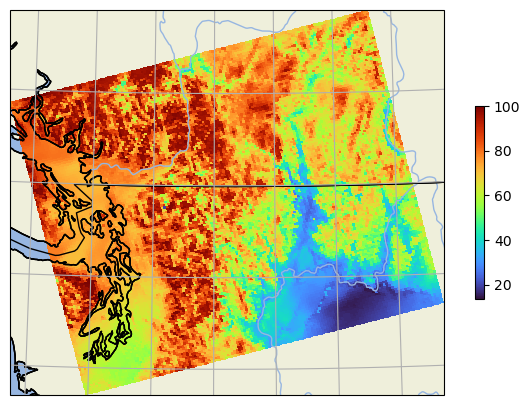

In [54]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy

skagit_surface = skagit[2]
skagit_rh = skagit[1]
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection=ccrs.LambertConformal())
# ax.coastlines()
# ax.set_extent(bounds)
# plot = skagit_tmp.t.plot(
#     cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.5}, x="latitude", y="longitude", ax=ax
# )


skagit_surface
# skagit_tmp = skagit_tmp.isel(time=0) # strip the time dimension
# lons = skagit_surface["longitude"].to_numpy()
# lats = skagit_surface["latitude"].to_numpy()
# data = (skagit_surface["t"]-273.15).to_numpy()
lons = skagit_rh["longitude"].to_numpy()
lats = skagit_rh["latitude"].to_numpy()
data = (skagit_rh["r2"]).to_numpy()

map_proj = ccrs.LambertConformal(
    central_latitude=(bounds[2]+bounds[3])/2, 
    central_longitude=(bounds[0]+bounds[1])/2
)

fig, ax = plt.subplots(
    figsize=(8, 5), facecolor="w",
    subplot_kw=dict(projection=map_proj ),
)

cm = ax.pcolormesh(lons, lats, data, cmap='turbo', transform=ccrs.PlateCarree())
cb = fig.colorbar(cm, ax=ax, shrink=.5)
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

# plt.title("TMP - Skagit")

# skagit_tmp.t.sel(longitude=bounds[0], latitude=bounds[2]).plot()

In [121]:
skagit_tmp.t.plot()

<xarray.DataArray 't' (y: 124, x: 151)> Size: 75kB
array([[ 8.821899 ,  9.259399 ,  9.071899 , ...,  8.446899 ,  8.134399 ,
         8.134399 ],
       [ 9.071899 ,  9.196899 ,  8.759399 , ...,  8.759399 ,  8.821899 ,
         6.6343994],
       [ 9.134399 ,  9.259399 ,  8.321899 , ...,  8.634399 ,  8.634399 ,
         7.8218994],
       ...,
       [ 6.6968994,  6.1343994, -0.4906006, ..., -4.0531006, -3.9281006,
        -2.9281006],
       [ 6.5718994,  5.6343994,  2.5093994, ..., -3.3031006, -2.9281006,
        -3.3031006],
       [ 6.3843994,  2.5093994,  2.5718994, ..., -1.8656006, -1.9281006,
        -2.4906006]], dtype=float32)
Coordinates:
    time        datetime64[ns] 8B 2020-03-02
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    latitude    (y, x) float64 150kB 46.72 46.72 46.73 ... 50.86 50.86 50.87
    longitude   (y, x) float64 150kB 237.0 237.0 237.1 ... 241.5 241.6 241.6
    valid_time  datetime64[ns] 8B 2020-03-02
Dimensions without coordinates: y, x

In [25]:
h.download("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

PosixPath('/Users/jesse/data/hrrr/20230101/subset_18ef59c7__hrrr.t00z.wrfsfcf00.grib2')

In [26]:
h.inventory("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
63,64,34940256,36222332.0,34940256-36222332,2023-01-01,2023-01-01,TMP,surface,anl,:TMP:surface:anl
74,75,44234631,45804243.0,44234631-45804243,2023-01-01,2023-01-01,RH,2 m above ground,anl,:RH:2 m above ground:anl
78,79,50884588,52092416.0,50884588-52092416,2023-01-01,2023-01-01,WIND,10 m above ground,0-0 day max fcst,:WIND:10 m above ground:0-0 day max fcst
83,84,54442559,54442770.0,54442559-54442770,2023-01-01,2023-01-01,APCP,surface,0-0 day acc fcst,:APCP:surface:0-0 day acc fcst
122,123,85698959,86360826.0,85698959-86360826,2023-01-01,2023-01-01,DSWRF,surface,anl,:DSWRF:surface:anl
123,124,86360827,88445279.0,86360827-88445279,2023-01-01,2023-01-01,DLWRF,surface,anl,:DLWRF:surface:anl


In [6]:
myFile = fh.get_localFilePath("^(?::TMP:surface|:RH:2 m above ground|:WIND:10 m above ground|:APCP:surface|:DSWRF:surface|:DLWRF:surface)")

AttributeError: 'FastHerbie' object has no attribute 'get_localFilePath'

In [29]:
myFile

PosixPath('/Users/jesse/data/hrrr/20230101/subset_18ef59c7__hrrr.t00z.wrfsfcf00.grib2')

In [51]:
print(wgrib2.inventory('/Users/jesse/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2'))

1:0:d=2020020120:TMP:surface:anl:
2:1389929:d=2020020120:RH:2 m above ground:anl:
3:2891449:d=2020020120:WIND:10 m above ground:0-0 day max fcst:
4:4049386:d=2020020120:APCP:surface:0-0 day acc fcst:
5:4049598:d=2020020120:DSWRF:surface:anl:
6:6202818:d=2020020120:DLWRF:surface:anl:



In [54]:
idx_file = wgrib2.create_inventory_file('/Users/jesse/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2')
idx_file, idx_file.exists()
pd.read_csv(idx_file, delimiter=":", header=None)

,0,1,2,3,4,5,6
0,1,0,d=2020020120,TMP,surface,anl,NaN
1,2,1389929,d=2020020120,RH,2 m above ground,anl,NaN
2,3,2891449,d=2020020120,WIND,10 m above ground,0-0 day max fcst,NaN
3,4,4049386,d=2020020120,APCP,surface,0-0 day acc fcst,NaN
4,5,4049598,d=2020020120,DSWRF,surface,anl,NaN
5,6,6202818,d=2020020120,DLWRF,surface,anl,NaN


In [18]:
skagit_bounds = limitGeographicRange("skagit_boundaries.json")
subset_file = wgrib2.region('/Users/jesse/data/hrrr/20200201/subset_21ef3e52__hrrr.t20z.wrfsfcf00.grib2', skagit_bounds, name="skagit-basin")
subset_file

TypeError: limitGeographicRange() missing 1 required positional argument: 'subsetFiles'

In [71]:
skagit_bounds

(-123.409663, -118.092281, 47.543471, 50.06801)

In [56]:
pd.read_csv(str(subset_file) + ".idx", delimiter=":", header=None)

,0,1,2,3,4,5,6
0,1,0,d=2020020120,TMP,surface,anl,NaN
1,2,18021,d=2020020120,RH,2 m above ground,anl,NaN
2,3,40324,d=2020020120,WIND,10 m above ground,0-0 day max fcst,NaN
3,4,59179,d=2020020120,APCP,surface,0-0 day acc fcst,NaN
4,5,59422,d=2020020120,DSWRF,surface,anl,NaN
5,6,90037,d=2020020120,DLWRF,surface,anl,NaN


In [1]:
# ds_region = xr.open_dataset(subset_file, engine="cfgrib", backend_kwargs={'errors': 'ignore'}
file_glob = '/Users/jesse/data/hrrr/**/*.grib2'
import glob
import cfgrib
import xarray as xr
files = [f for f in glob.glob(file_glob)]
merged_data = []
for f in files:
    dss = cfgrib.open_datasets(f)
    combined = xr.merge([ds.drop_vars(["surface", "heightAboveGround", "valid_time", "step"], errors="ignore") for ds in dss])
    merged_data.append(combined)
all_data = xr.concat(merged_data, dim='time')

In [2]:
# projection = ccrs.LambertConformal(central_longitude=262.5, 
#                                    central_latitude=38.5, 
#                                    standard_parallels=(38.5, 38.5),
#                                     globe=ccrs.Globe(semimajor_axis=6371229,
#                                                      semiminor_axis=6371229))
# all_data.metpy.assign_crs(projection)
# all_data.metpy.assign_y_x()
## Convert X, Y to Lat/Lon And Set those as index
# print(all_data.latitude.attrs)
# print(all_data.longitude.attrs)
########$ 
# all_data['longitude'] = all_data.longitude-360
# sample = cfgrib.open_datasets('/Users/jesse/data/hrrr/20230101/skagit-basin_subset_15ef59c7__hrrr.t08z.wrfsfcf00.grib2')
stacked = all_data.stack(gridcell=["y", "x"])
all_data, stacked
# all_data.expand_dims(dim='lat').set_index(lat='latitude').unstack()

(<xarray.Dataset> Size: 76MB
 Dimensions:    (time: 169, y: 124, x: 151)
 Coordinates:
   * time       (time) datetime64[ns] 1kB 2023-01-02T05:00:00 ... 2023-01-07T1...
     latitude   (y, x) float64 150kB 46.72 46.72 46.73 ... 50.86 50.86 50.87
     longitude  (y, x) float64 150kB 237.0 237.0 237.1 ... 241.5 241.6 241.6
 Dimensions without coordinates: y, x
 Data variables:
     si10       (time, y, x) float32 13MB 0.8766 1.502 1.252 ... 4.752 4.315 4.19
     r2         (time, y, x) float32 13MB 97.1 99.0 99.3 100.0 ... 80.3 81.3 84.3
     t          (time, y, x) float32 13MB 275.7 276.0 276.0 ... 265.8 265.4 266.8
     tp         (time, y, x) float32 13MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     dswrf      (time, y, x) float32 13MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     dlwrf      (time, y, x) float32 13MB 246.2 309.6 311.2 ... 294.8 290.3 290.0
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             kwbc
     GRIB_centreDescription:  US National Weather 

In [7]:
import dask.array as da
sets = [ds[1].drop_vars(['gridcell', 'y', 'x']).expand_dims("latitude").expand_dims("longitude") for ds in list(stacked.groupby('gridcell'))]
        # .rename({"latitude":"lat", "longitude":"long"})
        # .assign_coords({"latitude": stacked.latitude.values,"longitude": stacked.longitude.values })
        # .drop_vars(["lat", 'long'])
        # .assign_coords({"lat": stacked.latitude.values})
        # .assign_coords({"lon": stacked.longitude.values})
        # .swap_dims({"gridcell": })
half = xr.combine_by_coords(sets[:len(sets)/2])

/var/folders/28/n2khkrt15537q1z3stgtj5200000gn/T/ipykernel_41293/3112876625.py:2: UserWarning: The `squeeze` kwarg to GroupBy is being removed.Pass .groupby(..., squeeze=False) to disable squeezing, which is the new default, and to silence this warning.
  sets = [ds[1].drop_vars(['gridcell', 'y', 'x']).expand_dims("latitude").expand_dims("longitude") for ds in list(stacked.groupby('gridcell'))]


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
half2 = xr.combine_by_coords(sets[len(sets)//2:])

In [ ]:
# whole = xr.combine_by_corods([half, half2])
half, half2

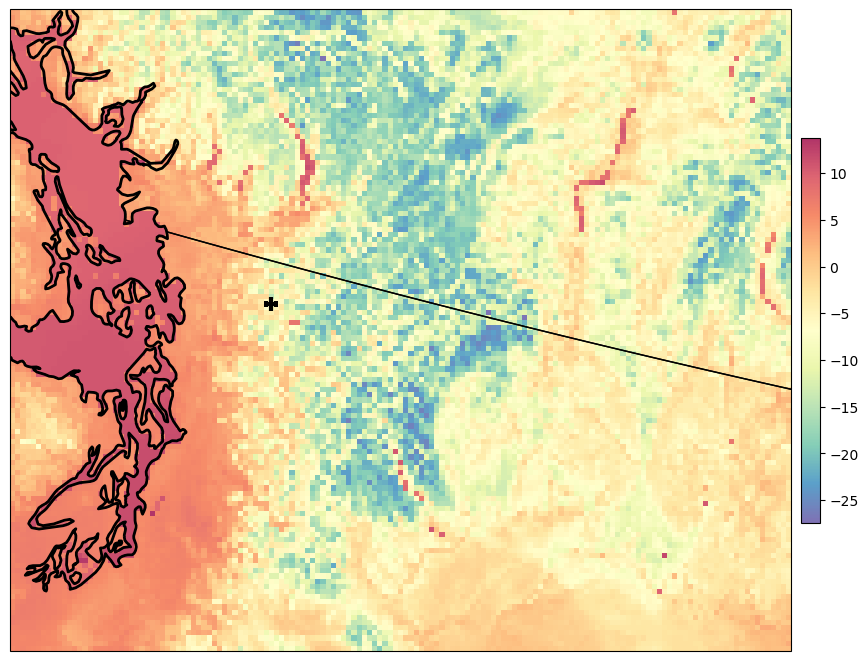

In [74]:
import cartopy.feature as cfeature
mt_baker_lat_lon = (48.7758, -121.8199)
lats = all_data.latitude
lons = all_data.longitude

abslat = np.abs(lats-mt_baker_lat_lon[0])
abslon = np.abs(lons-mt_baker_lat_lon[1])

projection = ccrs.LambertConformal(central_longitude=262.5, 
                                   central_latitude=38.5, 
                                   standard_parallels=(38.5, 38.5),
                                    globe=ccrs.Globe(semimajor_axis=6371229,
                                                     semiminor_axis=6371229))

# Plot time at a certain hour/to
fig = plt.figure(figsize=[12, 10])
ax = plt.axes(projection=projection)
D = ax.pcolormesh(lons, lats, all_data.t.sel(time='2023-01-03T12:00')-270.15, transform=ccrs.PlateCarree(), cmap='Spectral_r', alpha=.8)
fig.colorbar(D, ax=ax, shrink=.5, pad=.01)
ax.scatter(mt_baker_lat_lon[1], mt_baker_lat_lon[0], transform=ccrs.PlateCarree(), marker='+', s=100, c='k', linewidth=3)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=2)
ax.add_feature(cfeature.STATES.with_scale('10m'))

In [7]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55083,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:55094,Total threads: 3
Dashboard: http://127.0.0.1:55095/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:55086,


/opt/homebrew/Caskroom/miniforge/base/envs/skagit-met/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


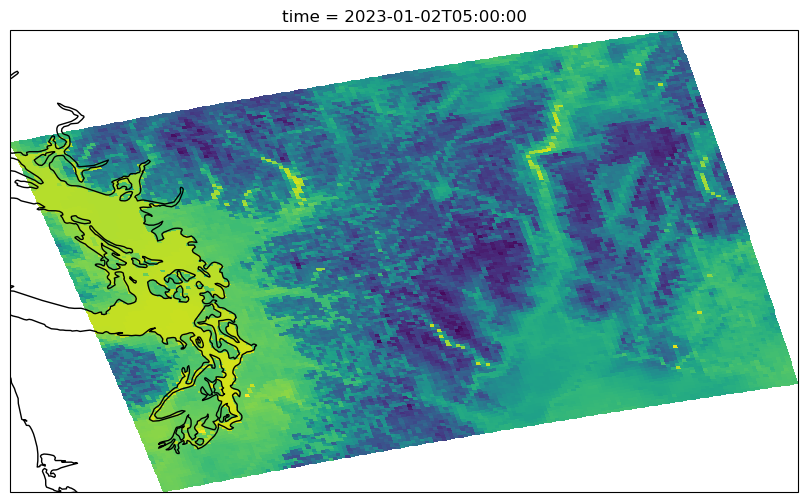

In [18]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

bounds = parseGeoJson('skagit_boundaries.json')

# X = longitude
plt.figure(figsize=(14, 6))
ax = plt.axes(
    projection=ccrs.PlateCarree(
        central_longitude=(bounds[0]+bounds[1])/2)
)
all_data.t[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", add_colorbar=False
)
ax.coastlines()

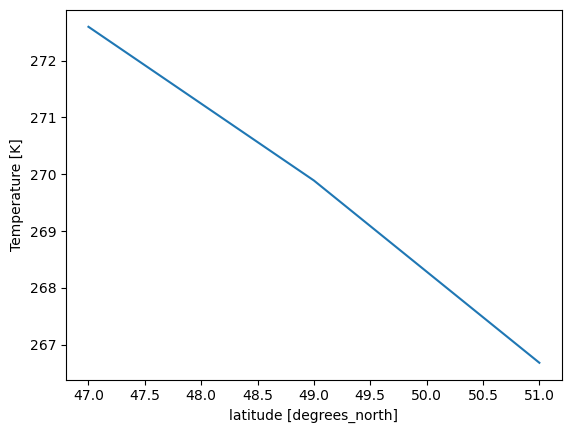

In [15]:
# define two-degree wide latitude bins
lat_bins = np.arange(0, 91, 2)
# define a label for each bin corresponding to the central latitude
lat_center = np.arange(1, 90, 2)
# group according to those bins and take the mean
T_lat_mean = all_data.t.groupby_bins("latitude", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
)
# plot the result
T_lat_mean.plot()


In [1]:
zarr_p = '/Users/jesse/data/z.zarr'
z = combined.to_zarr(zarr_p, mode='w')

NameError: name 'combined' is not defined

In [36]:
import zarr
import pyproj
# Find nearest station point in HRRR Data
mt_baker_lat_lon = (48.7758, -121.8199)
lats = all_data.latitude
lons = all_data.longitude

xz = xr.open_zarr('2023-01-01_2023-01-08_dat.zarr')
# xz.set_xindex(["latitude", "longitude"])
# xz.unstack()

projection = ccrs.LambertConformal(central_longitude=262.5, 
                                   central_latitude=38.5, 
                                   standard_parallels=(38.5, 38.5),
                                    globe=ccrs.Globe(semimajor_axis=6371229,
                                                     semiminor_axis=6371229))
x, y = ccrs.PlateCarree().transform_point(-121.6, 48.83, projection)
x,y

(np.float64(-97.49944086308264), np.float64(38.49890258090053))